# Introductory notebook for the model based on Auclert, Rognile and Straub  (2020)*

*Auclert, Adrien, Matthew Rognlie, and Ludwig Straub. Micro jumps, macro humps: Monetary policy and business cycles in an estimated HANK model. No. w26647. National Bureau of Economic Research, 2020.

TOC:
- Productivity states
- Policy functions
- Simulated distribution
- MPCs

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from tabulate import tabulate
from HANKStickyModel import HANKStickyModelClass

# Replication settings

# Model specification
The model has the following key features:
 - incomplete markets
 - two assets
 - sitcky wages and prices
 - capital and investment adjustment costs
 - long-term government debt

In contrast to the original model I will leave out the following:
- sticky information
- permanent heterogeneity

The DAG of the model used in the original paper is:
<img src="images\\DAG_Humps.png" alt="DAG Humps, Jumps" width=800 height=600 />
For the fiscal policy shock extension, there would be an additional arrow to the "fiscal" bubble.

In [2]:
model = HANKStickyModelClass(name='baseline')

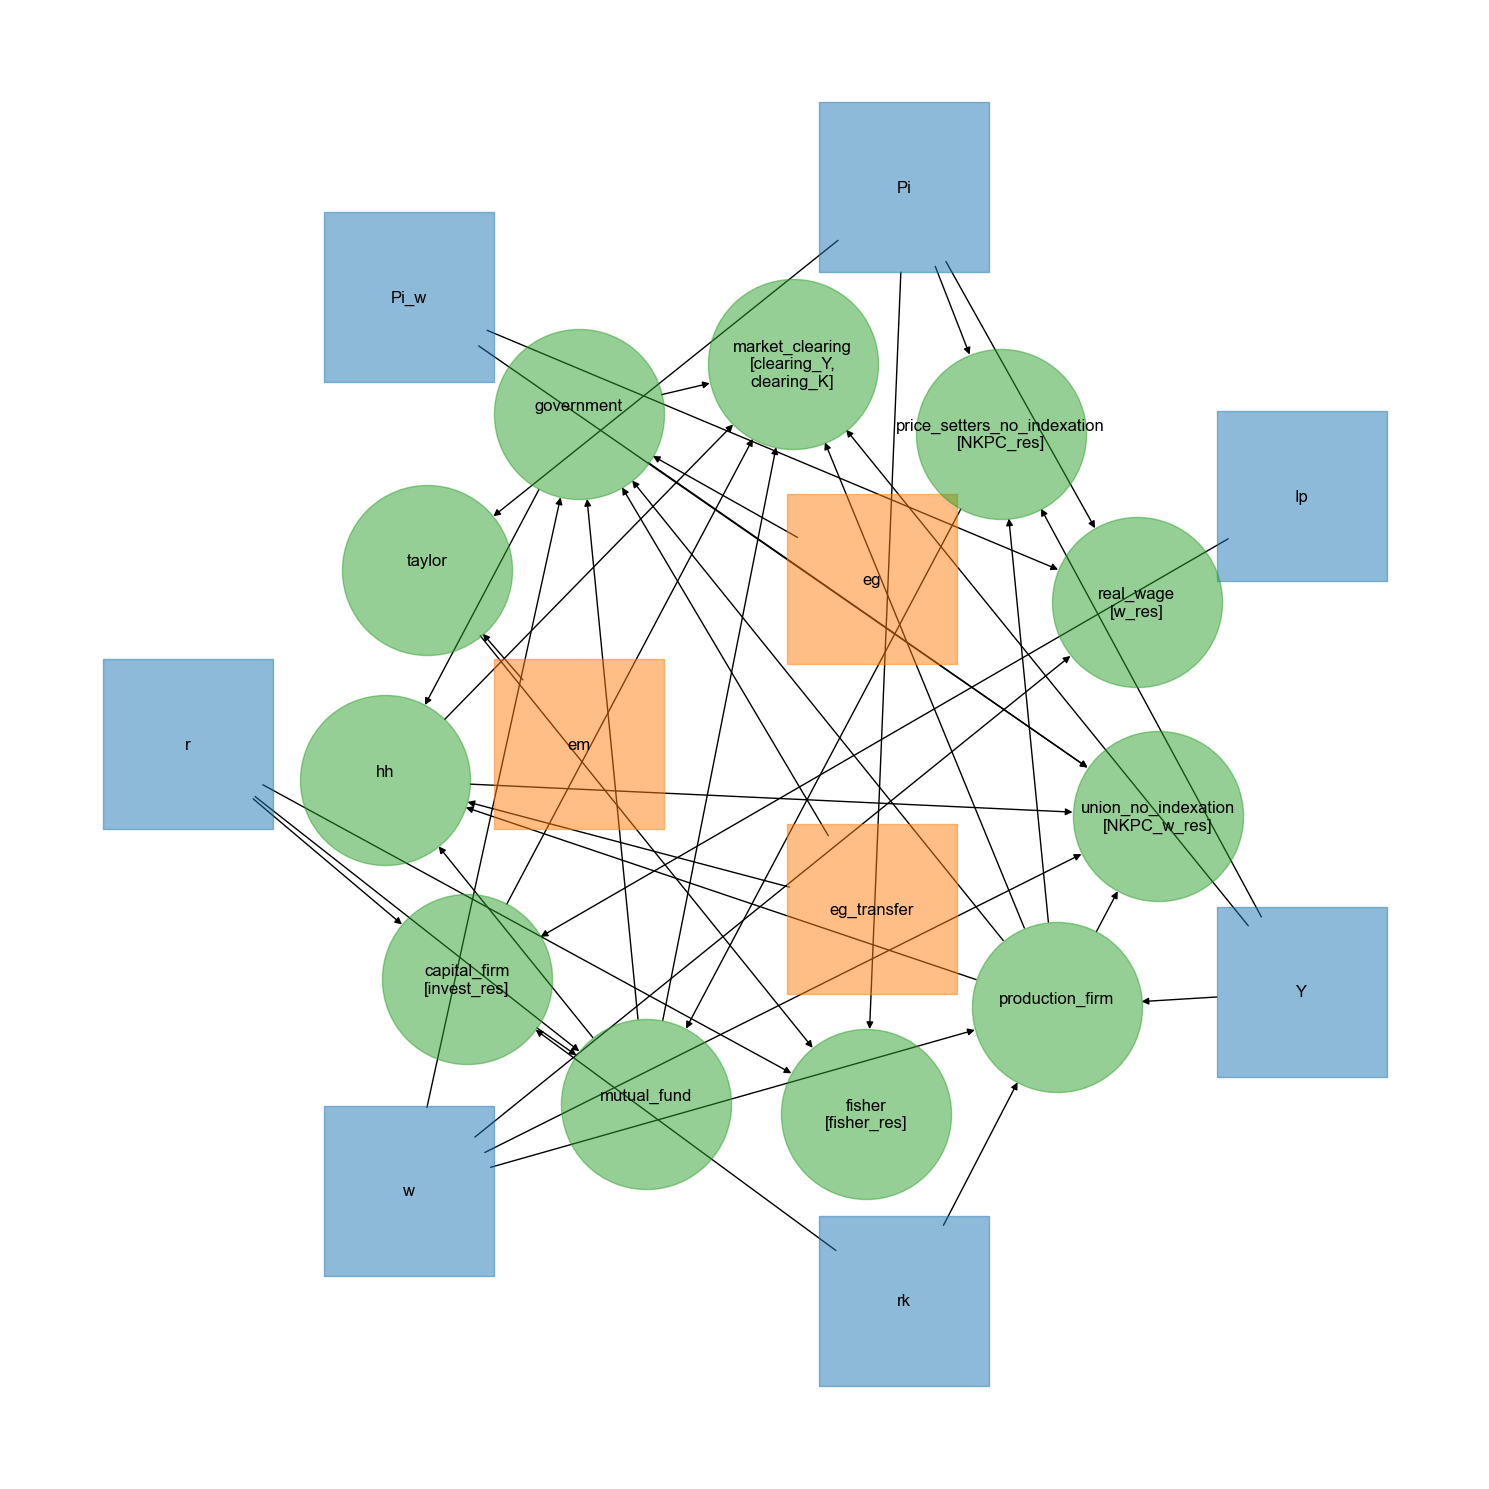

In [4]:
model.draw_DAG(figsize=(15,15),node_size=15000,order=['shocks','blocks','unknowns'])

# 1. Find Steady State

In [3]:
model.find_ss(do_print=True)

find beta for market clearing
 [beta, sigma_e] = [  0.995100000000,   0.500000000000] -> [ss.clearing_Y =   0.000080492593, ss.clearing_MPC =  -0.066523691258] [13.6 secs]
 [beta, sigma_e] = [  0.995100000000,   0.500000000000] -> [ss.clearing_Y =   0.000080492593, ss.clearing_MPC =  -0.066523691258] [7.9 secs]
 [beta, sigma_e] = [  0.995100000000,   0.500000000000] -> [ss.clearing_Y =   0.000080492593, ss.clearing_MPC =  -0.066523691258] [8.6 secs]
 [beta, sigma_e] = [  0.995100014828,   0.500000000000] -> [ss.clearing_Y =   0.000080455442, ss.clearing_MPC =  -0.066523185279] [8.7 secs]
 [beta, sigma_e] = [  0.995100000000,   0.500000007451] -> [ss.clearing_Y =   0.000080492041, ss.clearing_MPC =  -0.066523686616] [8.1 secs]
 [beta, sigma_e] = [  1.000146586360,   0.330409725269] -> [ss.clearing_Y =  -0.003265297937, ss.clearing_MPC =   0.119047448021] [12.2 secs]
 [beta, sigma_e] = [  0.997123443568,   0.413668460687] -> [ss.clearing_Y =   0.001248758130, ss.clearing_MPC =  -0.046935

## Productivity States

In [4]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [5]:
# steady state distribution for productivity states
for i_fix in range(par.Nfix):

    beta = par.beta_grid[i_fix]
    print(f'{beta = :.4f}:')

    Dz = ss.D.sum(axis=(2,3))

    for z,pr_z in zip(par.z_grid,Dz[i_fix]/np.sum(Dz[i_fix])):
        print(f' Pr[z = {z:.4f}] = {pr_z:.4f}')

print(f'Sum(Pr[z]) = {Dz.sum():.4f}')

beta = 0.9989:
 Pr[z = 0.3887] = 0.0156
 Pr[z = 0.5213] = 0.0937
 Pr[z = 0.6991] = 0.2344
 Pr[z = 0.9376] = 0.3125
 Pr[z = 1.2575] = 0.2344
 Pr[z = 1.6865] = 0.0938
 Pr[z = 2.2618] = 0.0156
Sum(Pr[z]) = 1.0000


In [6]:
# transition probabilites between states
for i_fix in range(par.Nfix):
    tab = np.concatenate((ss.z_trans[i_fix], ss.z_trans[i_fix,:,:].sum(axis=1).reshape(-1,1)), axis=1).round(3)
    index = np.array([f's = {s}' for s in range(par.Nz)]).reshape(-1,1)
    print(tab.shape, index.shape)
    tab = np.concatenate((index, tab), axis=1)
    header = [""] + [f's+ = {s}' for s in range(par.Nz)] + ["sum"]
    table = tabulate(tab, tablefmt='simple', headers=header)
    print(table)

(7, 8) (7, 1)
         s+ = 0    s+ = 1    s+ = 2    s+ = 3    s+ = 4    s+ = 5    s+ = 6    sum
-----  --------  --------  --------  --------  --------  --------  --------  -----
s = 0     0.902     0.094     0.004     0         0         0         0          1
s = 1     0.016     0.904     0.078     0.003     0         0         0          1
s = 2     0         0.031     0.904     0.062     0.002     0         0          1
s = 3     0         0.001     0.047     0.905     0.047     0.001     0          1
s = 4     0         0         0.002     0.062     0.904     0.031     0          1
s = 5     0         0         0         0.003     0.078     0.904     0.016      1
s = 6     0         0         0         0         0.004     0.094     0.902      1


## Policy functions

In [7]:
c = ss.c[0,:,:,:]
l = ss.l[0,:,:,:]
a = ss.a[0,:,:,:]

### Consumption and savings function at different illiquid asset grids

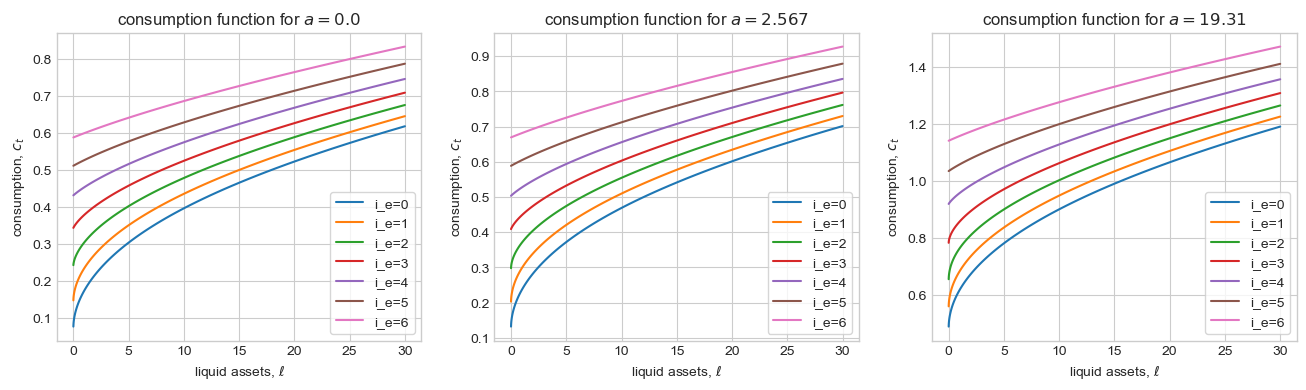

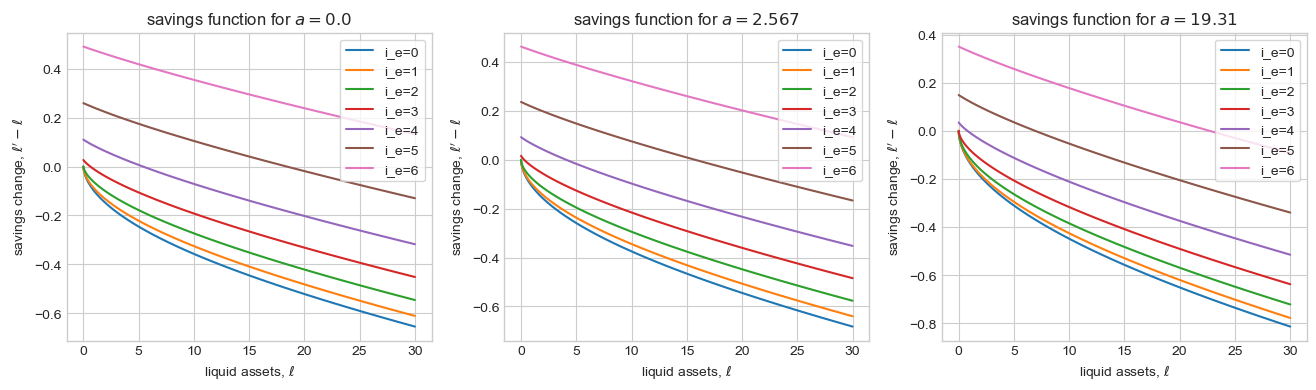

In [8]:
fig = plt.figure(figsize=(16,4),dpi=100)
a_points = [0,50,90]

for i,i_a in enumerate(a_points):
    a_i = par.a_grid[i_a]
    ax = fig.add_subplot(1,len(a_points),i+1)
    ax.set_title(f'consumption function for $a = {a_i:.4}$')
    for i_e in range(par.Nz):
        ax.plot(par.l_grid, c[i_e,:,i_a], label=f'i_e={i_e}')
    ax.legend(frameon=True)
    ax.set_xlabel('liquid assets, $\ell$')
    ax.set_ylabel('consumption, $c_t$')

fig = plt.figure(figsize=(16,4),dpi=100)
a_points = [0,50,90]
for i,i_a in enumerate(a_points):
    a_i = par.a_grid[i_a]
    ax = fig.add_subplot(1,len(a_points),i+1)
    ax.set_title(f'savings function for $a = {a_i:.4}$')
    for i_e in range(par.Nz):
        ax.plot(par.l_grid, l[i_e,:,i_a]-par.l_grid, label=f'i_e={i_e}')
    ax.legend(frameon=True)
    ax.set_xlabel('liquid assets, $\ell$')
    ax.set_ylabel('savings change, $\ell\'-\ell$')

### Policy function at the steady state

Text(0, 0.5, "savings change, $\\ell'-\\ell$")

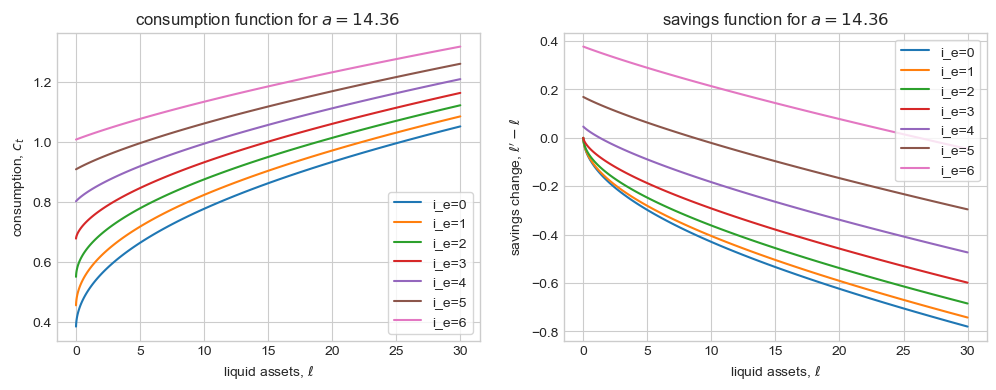

In [9]:
# find closest but smaller grid value to target
i_a_target = np.abs(par.a_grid-ss.A).argmin() # find grid value which is closest to the target
if par.a_grid[i_a_target] > ss.A:
    i_a_target += -1 # select grid value that is smaller than target
assert i_a_target <= par.Na, 'illiquid asset target outside of grid'
# find weights between grid value and target,
    # s.t. w*a_grid[i]+(1-w)*a_grid[i+1] = a_target
i_a_weight = (ss.A-par.a_grid[i_a_target+1]) / (par.a_grid[i_a_target]-par.a_grid[i_a_target+1])

fig = plt.figure(figsize=(12,4),dpi=100)

ax = fig.add_subplot(1,2,1)
ax.set_title(f'consumption function for $a = {ss.A:.4}$')
for i_e in range(par.Nz):
    c1 = c[i_e,:,i_a_target]
    c2 = c[i_e,:,i_a_target+1]
    c_a_ss = i_a_weight*c1 + (1-i_a_weight)*c2
    ax.plot(par.l_grid, c_a_ss, label=f'i_e={i_e}')
ax.legend(frameon=True)
ax.set_xlabel('liquid assets, $\ell$')
ax.set_ylabel('consumption, $c_t$')

ax = fig.add_subplot(1,2,2)
ax.set_title(f'savings function for $a = {ss.A:.4}$')
for i_e in range(par.Nz):
    l1 = l[i_e,:,i_a_target]
    l2 = l[i_e,:,i_a_target+1]
    l_a_ss = i_a_weight*l1 + (1-i_a_weight)*l2
    ax.plot(par.l_grid, l_a_ss-par.l_grid, label=f'i_e={i_e}')
ax.legend(frameon=True)
ax.set_xlabel('liquid assets, $\ell$')
ax.set_ylabel('savings change, $\ell\'-\ell$')

### Policy function for illiquid assets
The policy function for illiquid asset gives next periods illiquid assets given the interest rate for illiquid assets (steady state and contemporaneous), the illiquid asset target and the illiquid asset state.
It is independent of the other state and choice variables.

In [10]:
# check that pol. function for a is independent of c, l and s
for i_z in range(par.Nz-1):
    assert np.sum(a[i_z] - a[i_z+1]) == 0.0, 'policy function for illiquid assets changes with z'
for i_l in range(par.Nl-1):
    assert np.sum(a[:, i_l, :] - a[:, i_l+1, :]) == 0.0, 'policy function for illiquid assets changes with l'

Change in illiquid assets given different states of illiquid assets.
In other words: how does the households redistribute given they are at different grids for the illiquid asset.

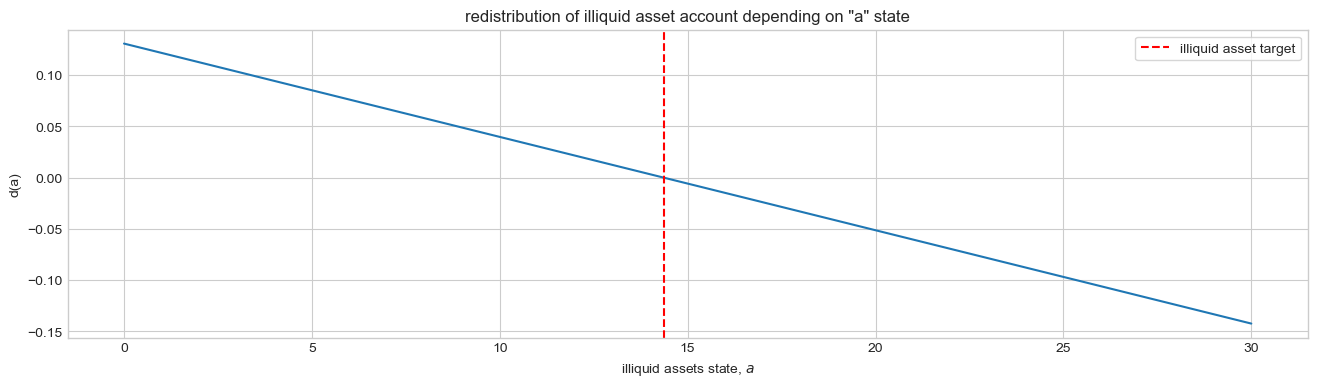

In [11]:
# plot change in illiquid assets
A_target = (par.hh_wealth_Y_ratio-par.L_Y_ratio)
fig = plt.figure(figsize=(16,4),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.set_title(f'redistribution of illiquid asset account depending on "a" state')
ax.plot(par.a_grid, a[0,0,:]-par.a_grid)
ax.axvline(x=A_target, color='red', linestyle='--', label='illiquid asset target')
ax.set_xlabel(f'illiquid assets state, $a$')
ax.set_ylabel(f'd(a)')
ax.legend(frameon=True)

Change in illiquid assets given different states of illiquid asset interest rates.
In other words: how does the households redistribute given the interest rate on the illiquid assets differs from the steady state value.

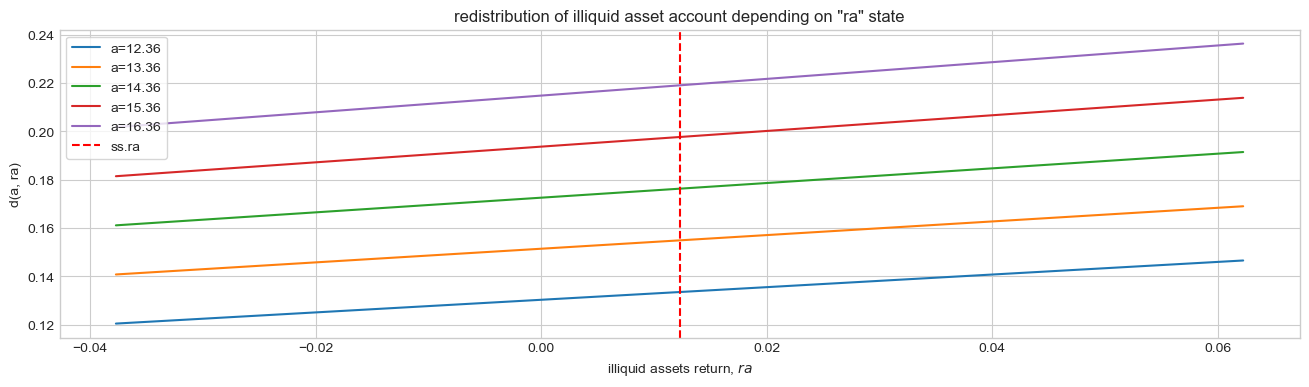

In [12]:
da = lambda a, ra: ss.r / (1 + ss.r) * (1+ra)*a + par.chi * (
            (1 + ra) * a - (1 + ss.r) * A_target)  # distribution from illiquid account
ra_grid = np.linspace(start=ss.ra - 0.05, stop=ss.ra + 0.05, num = 50)
a_states = np.linspace(start=A_target-2, stop=A_target+2, num=5)
fig = plt.figure(figsize=(16,4),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.set_title(f'redistribution of illiquid asset account depending on "ra" state')
for a_i in a_states:
    dA_grid = np.array([da(a_i, ra_i) for ra_i in ra_grid])
    ax.plot(ra_grid, dA_grid, label=f'a={a_i:.2f}')
ax.axvline(x=ss.ra, color='red', linestyle='--', label='ss.ra')
ax.set_xlabel(f'illiquid assets return, $ra$')
ax.set_ylabel(f'd(a, ra)')
ax.legend(frameon=True)

## Simulation / Distribution

Text(0, 0.5, 'CDF')

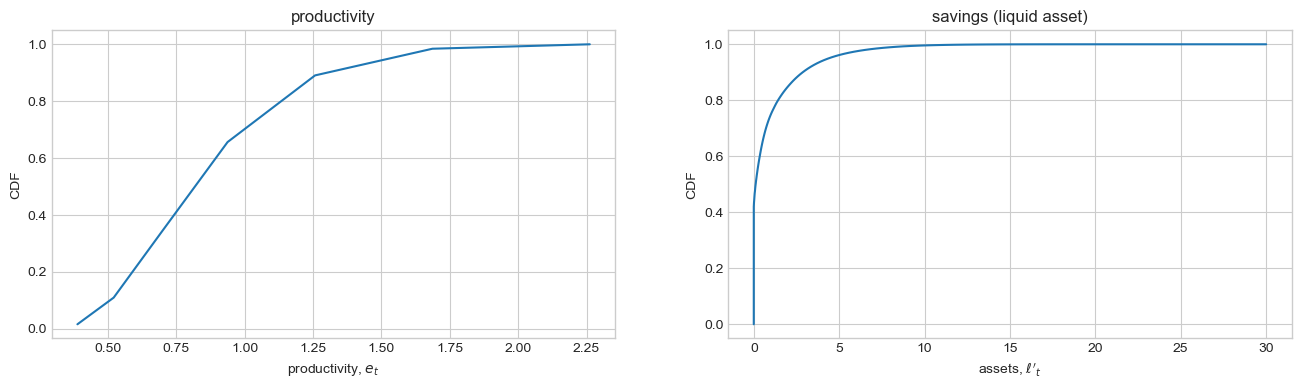

In [13]:
fig = plt.figure(figsize=(16,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')
ax.plot(par.z_grid,np.cumsum(np.sum(ss.D,axis=(0,2,3))))

ax.set_xlabel('productivity, $e_t$')
ax.set_ylabel('CDF')

# b. liquid assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings (liquid asset)')
ax.plot(np.insert(par.l_grid,0,par.l_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1,3))),0,0.0),label='discrete')
ax.set_xlabel('assets, $\ell\'_{t}$')
ax.set_ylabel('CDF')
# ax.set_xscale('symlog')

# # c. illiquid assets
# ax = fig.add_subplot(1,3,3)
# ax.set_title('illiquid assets')
# ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1,2))),0,0.0),label='discrete')
# ax.set_xlabel('assets, $a\'_{t}$')
# ax.set_ylabel('CDF')
# ax.set_xscale('symlog')

Text(0, 0.5, 'CDF')

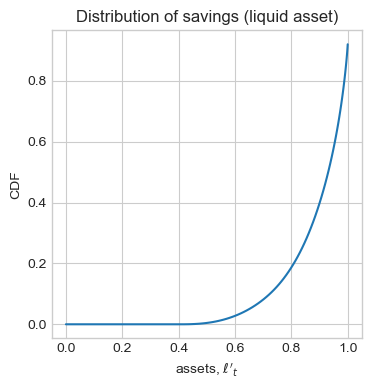

In [14]:
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.set_title('Distribution of savings (liquid asset)')
p_shares = np.cumsum(np.sum(ss.D,axis=(0,1,3)))
l_CDF = np.cumsum(np.sum(ss.D,axis=(0,1,3)) * par.l_grid)
ax.plot(np.insert(p_shares,0,0),np.insert(l_CDF,0,0.0),label='discrete')
ax.set_xlabel('assets, $\ell\'_{t}$')
ax.set_ylabel('CDF')

In [15]:
# shares over l grid
p_shares = np.sum(ss.D,axis=(0,1,3))
p_cumsum =np.cumsum(p_shares)
l_abs = np.sum(ss.D,axis=(0,1,3)) * par.l_grid
l_shares = l_abs / l_abs.sum()

l_a_abs = l_abs + par.A_target * p_shares
l_a_shares = l_a_abs / l_a_abs.sum()

### SCF data

In [16]:
# import os
# import csv
# from pathlib import Path
# from copy import deepcopy
# def import_SCF(data_path):
#     """Import the SCF wealth data"""
#     f = open(data_path + '/' + 'SCFwealthDataReduced.txt', 'r')
#     SCF_reader = csv.reader(f, delimiter='\t')
#     SCF_raw = list(SCF_reader)
#     SCF_wealth = np.zeros(len(SCF_raw)) + np.nan
#     SCF_weights = deepcopy(SCF_wealth)
#     for j in range(len(SCF_raw)):
#         SCF_wealth[j] = float(SCF_raw[j][0])
#         SCF_weights[j] = float(SCF_raw[j][1])
#     return SCF_wealth, SCF_weights

In [17]:
# # data_path = os.path.abspath(os.path.join(Path(__file__).parent.parent, 'data'))
# current_path = os.getcwd()
# data_path = os.path.join(current_path,'data')
# SCF_wealth, SCF_weights = import_SCF(data_path)
# SCF = np.stack((SCF_wealth, SCF_weights), axis=1)
# SCF = SCF[SCF[:, 0].argsort()]
# shares = (SCF[:, 1]/SCF[:, 1].sum()).cumsum()
# lorenz = ((SCF[:, 0]*SCF[:, 1])/(SCF[:, 0]*SCF[:, 1]).sum()).cumsum()

Liquid wealth

Sources:
https://www.federalreserve.gov/econres/scfindex.htm#table3
descriptions: https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbkfx0.htm
https://www.federalreserve.gov/econres/files/Networth%20Flowchart.pdf

In [18]:
current_path = os.getcwd()
data_path = os.path.join(current_path,'data','SCFP2019.csv')
df = pd.read_csv(data_path)

In [19]:
vars = {'WGT': 'Sample weight',
        'CDS': 'Total value of certificates of deposit held by household, 2019 dollars',
        'LIQ': 'Total value of all types of transactions accounts, 2019 dollars',
        'NMMF': 'Directly held pooled investment funds (exc. money mkt funds)',
        'SAVBND': 'Savings bonds',
        'STOCKS': 'Directly held stocks',
        'BOND': 'Directly held bonds (excl. bond funds orsavings bonds',
        'CASHLI': 'Cash value of whole life insurance',
        'OTHMA': 'Other managed assets',
        'RETQLIQ': 'Quasi-liquid retirement accounts',
        'OTHFIN': 'Other misc. financial assets',
        'FIN': 'Total financial assets',
        'NETWORTH': 'Total net worth'
}

In [20]:
df['weight'] = df['WGT'] / df['WGT'].sum()
# df['total'] = all others sum to FIN
df['weighted_FIN_assets'] = df['weight'] * df['FIN']
df = df.sort_values('FIN')
tab = np.asarray(df.loc[:, ['weight', 'FIN', 'weighted_FIN_assets']])

In [21]:
df['weighted_NET_assets'] = df['weight'] * df['NETWORTH']
df = df.sort_values('NETWORTH')
tab2 = np.asarray(df.loc[:, ['weight', 'NETWORTH', 'weighted_NET_assets']])

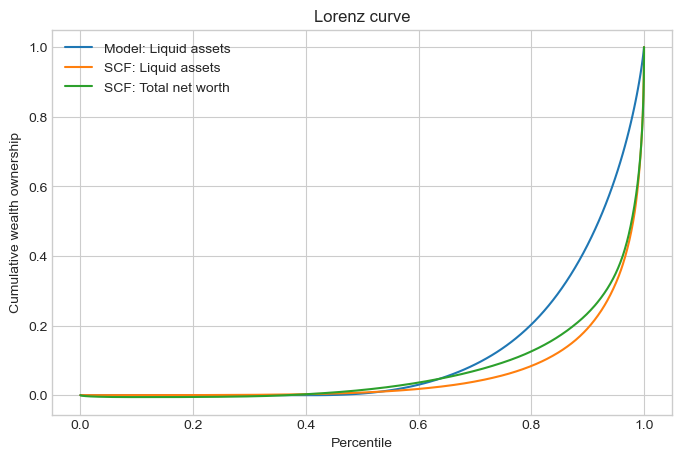

In [22]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
# ax.plot(shares, lorenz, label='SCF: Total net worth')
ax.plot(np.insert(p_cumsum, 0,0),np.insert(l_shares.cumsum(),0,0),label='Model: Liquid assets')
ax.plot(np.insert(tab[:,0].cumsum(), 0,0),np.insert((tab[:,2] / tab[:,2].sum()).cumsum(),0,0),label='SCF: Liquid assets')
ax.plot(np.insert(tab2[:,0].cumsum(), 0,0),np.insert((tab2[:,2] / tab2[:,2].sum()).cumsum(),0,0),label='SCF: Total net worth')
ax.set_xlabel(f"Percentile")
ax.set_ylabel(f"Cumulative wealth ownership")
ax.set_title(f'Lorenz curve')
plt.legend()

In [23]:
# for liquid assets
MPC = np.zeros(ss.D.shape)
dc = (ss.c[:, :, 1:, :] - ss.c[:, :, :-1, :])
l_grid_full = np.repeat(par.l_grid, par.Na).reshape(1,1,par.Nl,par.Na)
dl = (1 + ss.rl) * l_grid_full[:, :, 1:, :] - (1 + ss.rl) * l_grid_full[:, :, :-1, :]
MPC[:, :, :-1, :] = dc / dl
MPC[:, :, -1, :] = MPC[:, :, -2, :]  # assuming constant MPC at end
# mean_MPC = np.sum(MPC * ss.D)
# mean_MPC_ann = 1 - (1 - mean_MPC) ** 4
# print(f'mean MPC: {mean_MPC:.3f} [annual (approx.): {mean_MPC_ann:.3f}]')

MPC_l = (MPC * ss.D).sum(axis=(0,1,3)) / ss.D.sum(axis=(0,1,3))
MPC_z = (MPC * ss.D).sum(axis=(0,2,3)) / ss.D.sum(axis=(0,2,3))

Average quarterly MPC over the liquid asset distribution
and
Average quarterly MPC over productivity states

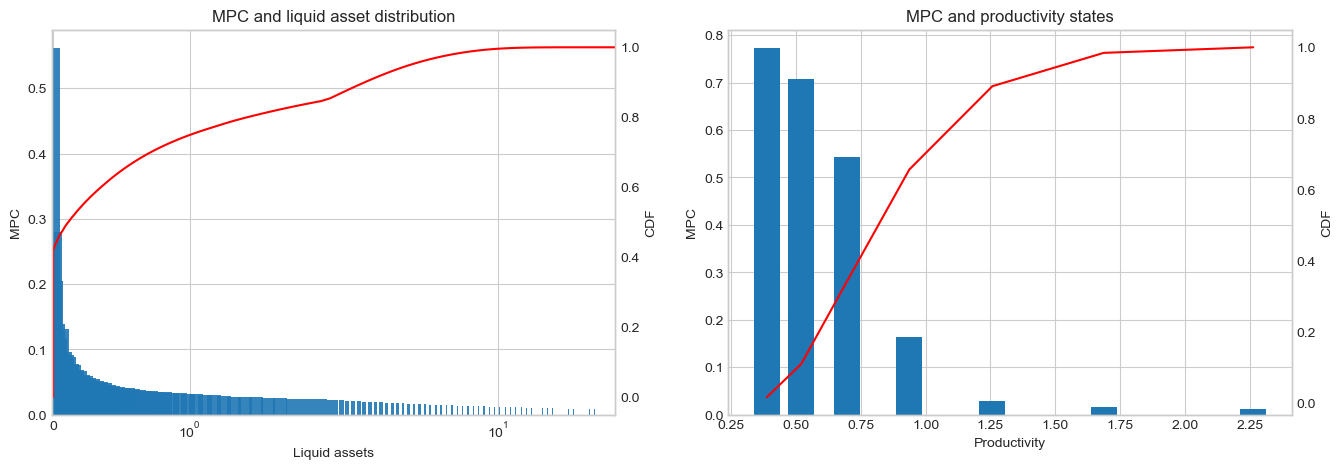

In [24]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)
ax.bar(par.l_grid, MPC_l, width=0.1, alpha=0.9)
ax.set_xlabel(f"Liquid assets")
ax.set_ylabel(f"MPC")
ax.set_title(f'MPC and liquid asset distribution')
ax.set_xscale('symlog')
ax.set_xlim([-0.01,par.l_grid[-1]])

ax2 = ax.twinx()
ax2.plot(np.insert(par.l_grid,0,par.l_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1,3))),0,0.0), color='red')
ax2.set_ylabel('CDF')
ax2.set_xscale('symlog')
ax2.grid(visible=None)



ax = fig.add_subplot(1,2,2)
ax.bar(par.z_grid, MPC_z, label='MPC', width=0.1)
ax.set_xlabel(f"Productivity")
ax.set_ylabel(f"MPC")
ax.set_title(f'MPC and productivity states')
# ax.set_xlim([0,par.z_grid[-1]])

ax2 = ax.twinx()
ax2.plot(par.z_grid,np.cumsum(np.sum(ss.D,axis=(0,2,3))), color='red', label='CDF')
ax2.set_ylabel('CDF')
ax2.grid(visible=None)


In [25]:
# Expected illiquid asset holdings
E_a = (a*ss.D).sum()
print(f'Expected Assets minus target = {E_a - ss.A:.3e}')
d_i_a_target = (ss.D).sum(axis=(0,1,2))[i_a_target]
d_i_a_target_p1 = (ss.D).sum(axis=(0,1,2))[i_a_target+1]
print(f'weight at illiquid asset grids to both sides of the target: {d_i_a_target:.4f} and {d_i_a_target_p1:.4f}, sum {d_i_a_target+d_i_a_target_p1:.4f}')

Expected Assets minus target = 2.824e-13
weight at illiquid asset grids to both sides of the target: 0.0244 and 0.9756, sum 1.0000


### MPCs

In [26]:
# for liquid assets
MPC = np.zeros(ss.D.shape)
dc = (ss.c[:, :, 1:, :] - ss.c[:, :, :-1, :])
l_grid_full = np.repeat(par.l_grid, par.Na).reshape(1,1,par.Nl,par.Na)
dl = (1 + ss.rl) * l_grid_full[:, :, 1:, :] - (1 + ss.rl) * l_grid_full[:, :, :-1, :]
MPC[:, :, :-1, :] = dc / dl
MPC[:, :, -1, :] = MPC[:, :, -2, :]  # assuming constant MPC at end
mean_MPC = np.sum(MPC * ss.D)
mean_MPC_ann = 1 - (1 - mean_MPC) ** 4
print(f'mean MPC: {mean_MPC:.3f} [annual: {mean_MPC_ann:.3f}]')

mean MPC: 0.265 [annual: 0.709]


In [27]:
# for illiquid assets
MPC = np.zeros(ss.D.shape)
dc = (ss.c[:, :, :, 1:] - ss.c[:, :, :, :-1])
a_grid_full = np.repeat(par.a_grid, par.Nl).reshape(1,1,par.Nl,par.Na).swapaxes(2,3)
da = (1 + ss.ra) * a_grid_full[:, :, :, 1:] - (1 + ss.ra) * a_grid_full[:, :, :, :-1]
MPC[:, :, :, :-1] = dc / da
MPC[:, :, :, -1] = MPC[:, :, :, -2]  # assuming constant MPC at end
mean_MPC = np.sum(MPC * ss.D)
# mean_MPC_ann = 1 - (1 - mean_MPC) ** 4
# print(f'mean MPC: {mean_MPC:.3f} [annual: {mean_MPC_ann:.3f}]')
print(f'mean MPC out of illiquid assets: {mean_MPC:.3f})')

mean MPC out of illiquid assets: 0.023)


Based on Jacobians

In [28]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for eg_transfer     in 5.9 secs
curly_Y and curly_D calculated for ra              in 6.7 secs
curly_Y and curly_D calculated for rl              in 6.3 secs
curly_Y and curly_D calculated for tau             in 6.4 secs
curly_Y and curly_D calculated for wN              in 6.5 secs
curly_E calculated in 4.7 secs
builiding blocks combined in 4.0 secs
household Jacobian computed in 40.4 secs

full Jacobians:
full Jacobian to unknowns computed in 8.5 secs [in evaluate_blocks(): 2.3 secs]
full Jacobian to shocks computed in 2.3 secs [in evaluate_blocks(): 0.4 secs]


In [29]:
MPC_annual_transfers = np.sum([model.jac_hh[('C_hh', 'eg_transfer')][i, 0] / (1 + ss.r) ** i for i in range(4)])
print(f'Annual MPC for an increase in eg_transfers: {MPC_annual_transfers:.2f}')
d_ra = 0.01
MPC_annual_ra = np.sum([model.jac_hh[('C_hh', 'ra')][i, 0] * d_ra / (1 + ss.r) ** i for i in range(4)])
print(f'Annual MPC for an increase ra by {d_ra * 100}%: {MPC_annual_ra:.2f}')

Annual MPC for an increase in eg_transfers: 0.52
Annual MPC for an increase ra by 1.0%: 0.01


## Dependence on chi

Annual ra: 5.5000 % for 4 periods
annual Consumption increase for the given ra shock is 0.4381133584710771 %


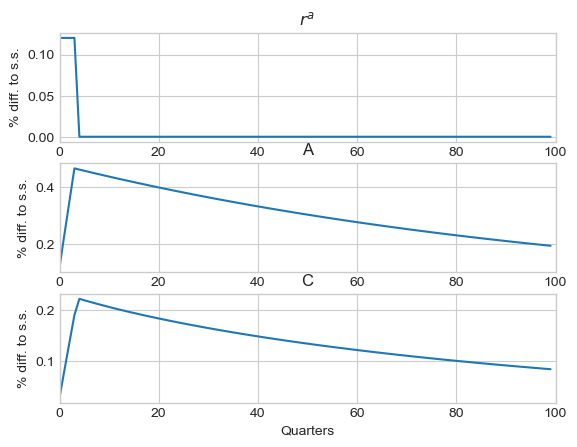

In [30]:
chi = par.chi

d = lambda ra, a: ss.ra / (1 + ss.ra) * (1 + ra) * a + chi * ((1 + ra) * a - (1 + ss.ra) * ss.A)

T = 100

a_t = np.zeros(T)
d_t = np.zeros(T)
ra = np.repeat(ss.r, T)

d_t_ss = d(ss.ra, ss.A)
a_0 = ss.A

shock_annual = 0.005
N_shock = 4
ra_shock = ((1 + ss.ra) ** 4 + shock_annual) ** (1/4) - 1
print(f'Annual ra: {((ra_shock+1) ** 4 - 1) * 100:.4f} % for {N_shock} periods')
ra[:N_shock] = ra_shock

d_C = model.jac_hh[('C_hh', 'ra')][:T,:T] @ (ra - ss.ra)
d_A = model.jac_hh[('A_hh', 'ra')][:T,:T] @ (ra - ss.ra)

print(f'annual Consumption increase for the given ra shock is {d_C[:4].sum() / ss.C_hh * 100} %')

fig, axs = plt.subplots(ncols=1, nrows=3)
axs[0].plot(np.arange(T), (ra - ss.ra)*100)
axs[1].plot(np.arange(T), d_A / ss.A_hh * 100)
axs[2].plot(np.arange(T), d_C / ss.C_hh * 100)
axs[2].set_xlabel('Quarters')
titles = [f'$r^a$','A','C']
for i, ax in enumerate(axs):
    ax.set_xlim(0,100)
    ax.set_ylabel('% diff. to s.s.')
    ax.set_title(titles[i])


In [227]:
model = HANKStickyModelClass(name='baseline', par={'beta_mean': 0.9988, 'sigma_e': 0.36, 'a_min': 11.0})
model.find_ss(do_print=True)

find beta for market clearing
 [beta, sigma_e] = [  0.998800000000,   0.360000000000] -> [ss.clearing_Y =   0.000231679461, ss.clearing_MPC =  -0.003870151628] [9.8 secs]
 [beta, sigma_e] = [  0.998800000000,   0.360000000000] -> [ss.clearing_Y =   0.000231679461, ss.clearing_MPC =  -0.003870151628] [7.0 secs]
 [beta, sigma_e] = [  0.998800000000,   0.360000000000] -> [ss.clearing_Y =   0.000231679461, ss.clearing_MPC =  -0.003870151628] [6.8 secs]
 [beta, sigma_e] = [  0.998800014883,   0.360000000000] -> [ss.clearing_Y =   0.000231620987, ss.clearing_MPC =  -0.003869216804] [6.8 secs]
 [beta, sigma_e] = [  0.998800000000,   0.360000005364] -> [ss.clearing_Y =   0.000231678958, ss.clearing_MPC =  -0.003870146648] [6.8 secs]
 [beta, sigma_e] = [  0.998865933004,   0.359707920979] -> [ss.clearing_Y =  -0.000003200191, ss.clearing_MPC =  -0.000082776005] [7.1 secs]
 [beta, sigma_e] = [  0.998871121960,   0.359453304023] -> [ss.clearing_Y =   0.000000098279, ss.clearing_MPC =   0.00000874

In [228]:
par = model.par

In [229]:
# chi = 0.1
# shock_annual = 0.01
# ra_shock = ((1 + ss.ra) ** 4 + shock_annual) ** (1/4) - 1
#
# e = par.z_grid[0]  # productivity
# Ze = ss.Z * e   # labor income
# for i_a, a_i in enumerate(par.a_grid):
#     a_lag = a_i
#     d = ss.ra/(1+ss.ra)*(1+ra_shock)*a_lag + chi*((1+ra_shock)*a_lag-(1+ss.ra)*par.A_target)
#     m = (1 + ss.rl) * par.l_grid[0] + Ze + d
#     print(i_a, m)

Annual ra: 5.5000 % for 4 periods
chi: 0.1
annual Consumption increase for the given ra shock is 0.8166220053826511 %
chi: 0.05
annual Consumption increase for the given ra shock is 0.6151607078258459 %
chi: 0.009
annual Consumption increase for the given ra shock is 0.43835257339782896 %
chi: 0.0
annual Consumption increase for the given ra shock is 0.3928427957414518 %


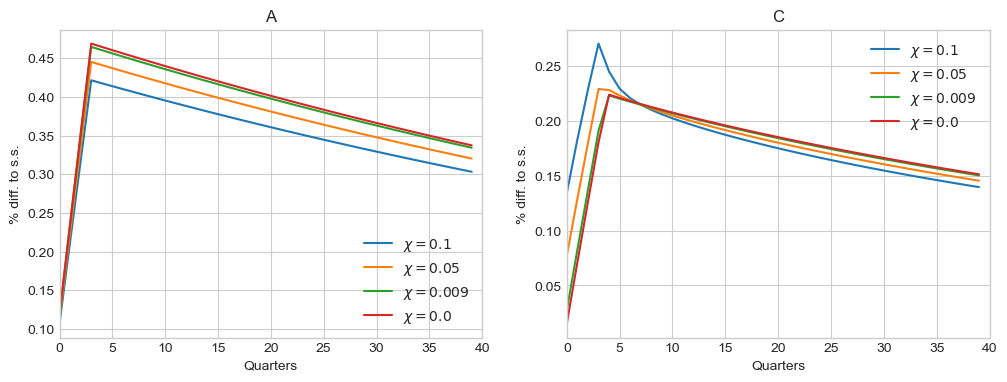

In [235]:
T = 40

# chis = [0.0, 0.009, 0.015]
chis = [0.1, 0.05, 0.009, 0.0]

ra = np.repeat(ss.r, T)
shock_annual = 0.005
N_shock = 4
ra_shock = ((1 + ss.ra) ** 4 + shock_annual) ** (1/4) - 1
print(f'Annual ra: {((ra_shock+1) ** 4 - 1) * 100:.4f} % for {N_shock} periods')
ra[:N_shock] = ra_shock

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(6*2,4*1),dpi=100)
for chi in chis:
    print(f'chi: {chi}')
    model.par.chi = chi
    model._compute_jac_hh(inputs_hh_all=['ra'], do_print=False)

    d_C = model.jac_hh[('C_hh', 'ra')][:T,:T] @ (ra - ss.ra)
    d_A = model.jac_hh[('A_hh', 'ra')][:T,:T] @ (ra - ss.ra)

    print(f'annual Consumption increase for the given ra shock is {d_C[:4].sum() / ss.C_hh * 100} %')

    # print(f'annual Consumption increase for the given ra shock is {d_C[:4] / ss.C_hh * 100} %')

    # axs[0].plot(np.arange(T), (ra - ss.ra)*100, label=f'$\chi={chi}$')
    axs[0].plot(np.arange(T), d_A / ss.A_hh * 100, label=f'$\chi={chi}$')
    axs[1].plot(np.arange(T), d_C / ss.C_hh * 100, label=f'$\chi={chi}$')
    titles = ['A','C']
    for i, ax in enumerate(axs):
        ax.set_xlabel('Quarters')
        ax.set_xlim(0,T)
        ax.set_ylabel('% diff. to s.s.')
        ax.set_title(titles[i])
        ax.legend()


# Calibration

In [19]:
from scipy.optimize import newton

par = model.par
ss = model.ss
xi_p = 0.72
e_p = par.e_p

kappa = 0.03

def residual_kappa(xi_p, *args):
    RHS = ((1 - xi_p) * (1 - xi_p/ (1 + ss.r))) / xi_p * e_p / (e_p - 1)
    return kappa - RHS

newton(residual_kappa, 0.8, args=[kappa, ss.r, e_p])

e_w = par.e_w

kappa = 0.03

def residual_kappa(xi_w, *args):
    RHS = (1 - xi_w) * (1 - xi_w * par.beta_w) / xi_w \
                  * e_w / (e_w - 1)
    return kappa - RHS

newton(residual_kappa, 0.8, args=[kappa, ss.r, par.beta_w, e_w])

0.8603802099987224